# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load data

In [5]:
#load and read training data
train_data = pd.read_csv('titanic_train.csv') 

#load and read test data
test_data = pd.read_csv('titanic_test.csv')

In [6]:
#combine both training and testing data for preprocessing
comb = pd.concat([train_data, test_data], axis=0)

In [7]:
comb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data preprocessing

In [8]:
#drop irrelevent columns
comb = comb.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [9]:
#encode
label_encoder = LabelEncoder()
comb['Sex'] = label_encoder.fit_transform(comb['Sex'])

In [10]:
#fill na in missing values
comb['Age'].fillna(comb['Age'].median(), inplace=True)
comb['Fare'].fillna(comb['Fare'].median(), inplace=True)

In [12]:
#split
train_data = comb[:len(train_data)]
test_data = comb[len(train_data):].copy()

In [14]:
#split the train_data into x and y
x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [15]:
#split the data into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# Model Training

In [16]:
#train the model by XGBoost
model = XGBClassifier()
model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
#make predictions on the testing set
y_predict = model.predict(x_test)

In [20]:
#evalute the model
accuracy = accuracy_score(y_test, y_predict)
print("validation accuracy: ",accuracy)

validation accuracy:  0.8100558659217877


In [21]:
#preprocess the test data
test_data_processed = test_data.drop('Survived', axis=1)

In [24]:
#add passengerid column
test_data.loc[:, 'PassengerId'] = pd.read_csv('titanic_test.csv')['PassengerId'].values

# Predictions

In [25]:
#make predication on test set
test_prediction = model.predict(test_data_processed)

In [27]:
#save the test prediction to a csv file
test_data[test_data.columns[test_data.columns.get_loc('Survived')]] = test_prediction
test_data[['PassengerId', 'Survived']].to_csv('predictions.csv'), index=False)

# data visualization

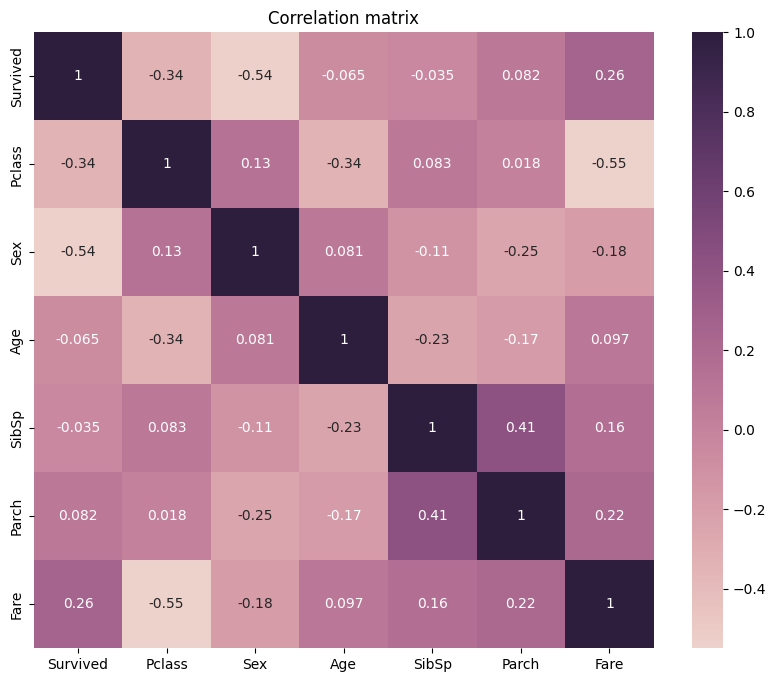

In [32]:
#correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation matrix")
plt.show()

Survived and Pclass have a negative correlation(-0.34), indicating that as the passenger class (Pclass) increases, the likelihood of survival decreases. Higher class values correspond to lower socieconomic class

Survived and Sex have a strong negative correlation(-0.54), indicating that being female (coded as 1) is associated with a higher chance of survival compared to being male(coded as 0)

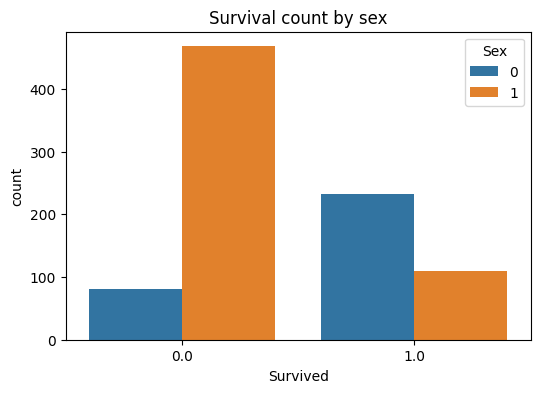

In [34]:
#bar plot for survival by sex
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title("Survival count by sex")
plt.show()

#### female (coded as 1) is associated with a higher chance of survival compared to being male(coded as 0)

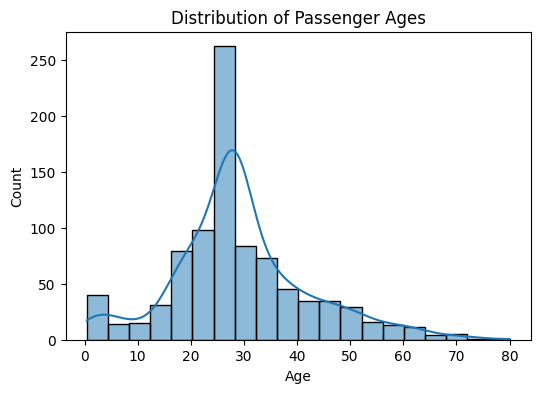

In [38]:
#histogram of passenger ages
plt.figure(figsize=(6,4))
sns.histplot(data=train_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.show()

#### passenger with age near to 25 are more than 250 compare to others ages passenger.

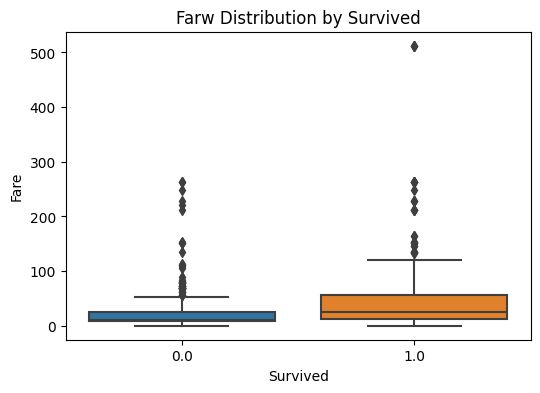

In [39]:
#box plot of fare by survival
plt.figure(figsize=(6,4))
sns.boxplot(data=train_data, x='Survived', y='Fare')
plt.title("Farw Distribution by Survived")
plt.show()

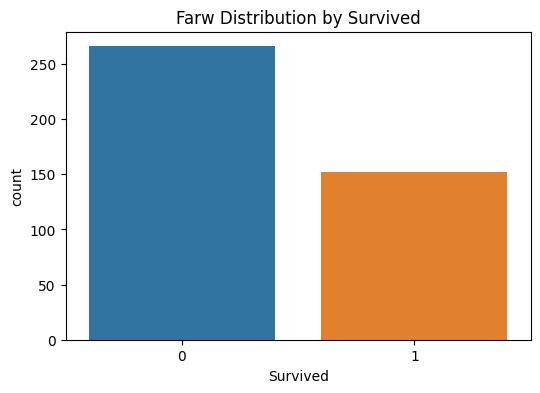

In [43]:
#load the prediction data
prediction_data = pd.read_csv('predictions.csv')

#bar plot for predicted survived
plt.figure(figsize=(6,4))
sns.countplot(data=prediction_data, x='Survived')
plt.title("Farw Distribution by Survived")
plt.show()

The prediction data shows that near to 150 passengers have chances to survive

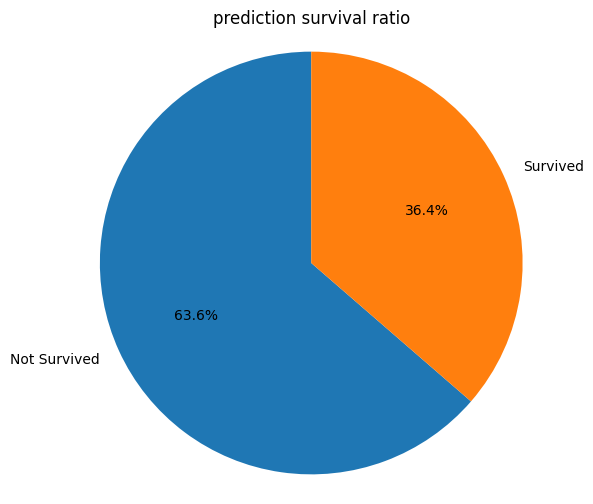

In [44]:
#pie chart for predicted survived ratio
plt.figure(figsize=(6,6))
survival_counts = prediction_data['Survived'].value_counts()
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("prediction survival ratio")
plt.axis('equal')
plt.show()

In this pie chart its chart its shows that 36.4% passengers have chances to survive and 63.6% passenger have the less changes of survival.